In [93]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [94]:
dataset = 'gen_data/landmark.csv'
model_save_path = 'gen_model/landmark.hdf5'

In [95]:
NUM_CLASSES = 9

In [96]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [97]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [99]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [100]:
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])"""

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Input((21 * 2, )),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(20, activation='relu'),\n    tf.keras.layers.Dropout(0.4),\n    tf.keras.layers.Dense(10, activation='relu'),\n    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')\n])"

In [101]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_16 (Dense)            (None, 40)                1720      
                                                                 
 dropout_13 (Dropout)        (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 20)                820       
                                                                 
 dropout_14 (Dropout)        (None, 20)                0         
                                                                 
 dense_18 (Dense)            (None, 10)                210       
                                                                 
 dense_19 (Dense)            (None, 9)                

In [102]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [103]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [104]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
68/98 [===================>..........] - ETA: 0s - loss: 2.1520 - accuracy: 0.2014
Epoch 1: saving model to gen_model\landmark.hdf5
98/98 [==============================] - 1s 3ms/step - loss: 2.1019 - accuracy: 0.2184 - val_loss: 1.8557 - val_accuracy: 0.2451
Epoch 2/1000
95/98 [============================>.] - ETA: 0s - loss: 1.7040 - accuracy: 0.3489
Epoch 2: saving model to gen_model\landmark.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.6980 - accuracy: 0.3515 - val_loss: 1.1949 - val_accuracy: 0.5646
Epoch 3/1000
98/98 [==============================] - ETA: 0s - loss: 1.3172 - accuracy: 0.4807
Epoch 3: saving model to gen_model\landmark.hdf5
98/98 [==============================] - 0s 2ms/step - loss: 1.3172 - accuracy: 0.4807 - val_loss: 0.8786 - val_accuracy: 0.7212
Epoch 4/1000
79/98 [=======================>......] - ETA: 0s - loss: 1.1434 - accuracy: 0.5432
Epoch 4: saving model to gen_model\landmark.hdf5
98/98 [==========================

In [105]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

33/33 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9993


In [106]:

model = tf.keras.models.load_model(model_save_path)

In [107]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.9862301e-01 8.3999585e-05 3.5065029e-14 1.7972813e-17 4.2557882e-29
 1.2741473e-03 2.8777213e-14 3.3613571e-14 1.8865952e-05]
0


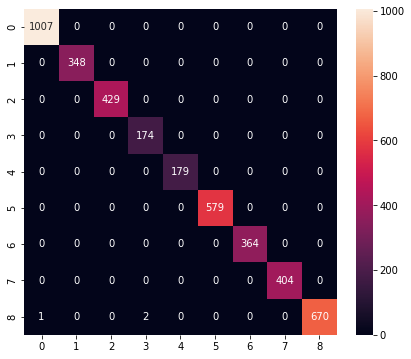

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1007
           1       1.00      1.00      1.00       348
           2       1.00      1.00      1.00       429
           3       0.99      1.00      0.99       174
           4       1.00      1.00      1.00       179
           5       1.00      1.00      1.00       579
           6       1.00      1.00      1.00       364
           7       1.00      1.00      1.00       404
           8       1.00      1.00      1.00       673

    accuracy                           1.00      4157
   macro avg       1.00      1.00      1.00      4157
weighted avg       1.00      1.00      1.00      4157



In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [109]:

model.save(model_save_path, include_optimizer=False)

In [110]:
tflite_save_path = 'gen_model/landmark.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\giang\AppData\Local\Temp\tmpiqhcvhrq\assets


INFO:tensorflow:Assets written to: C:\Users\giang\AppData\Local\Temp\tmpiqhcvhrq\assets


8832

In [111]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [112]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [113]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [114]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [115]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9890316e-01 7.2123119e-05 2.4599673e-14 1.2018623e-17 2.0532560e-29
 1.0070471e-03 2.0459537e-14 1.6270249e-14 1.7600973e-05]
0
